# Chapter 4. Equity Modeling #

## Code segment 4.1  
Figure 4.1 in Section 4.1

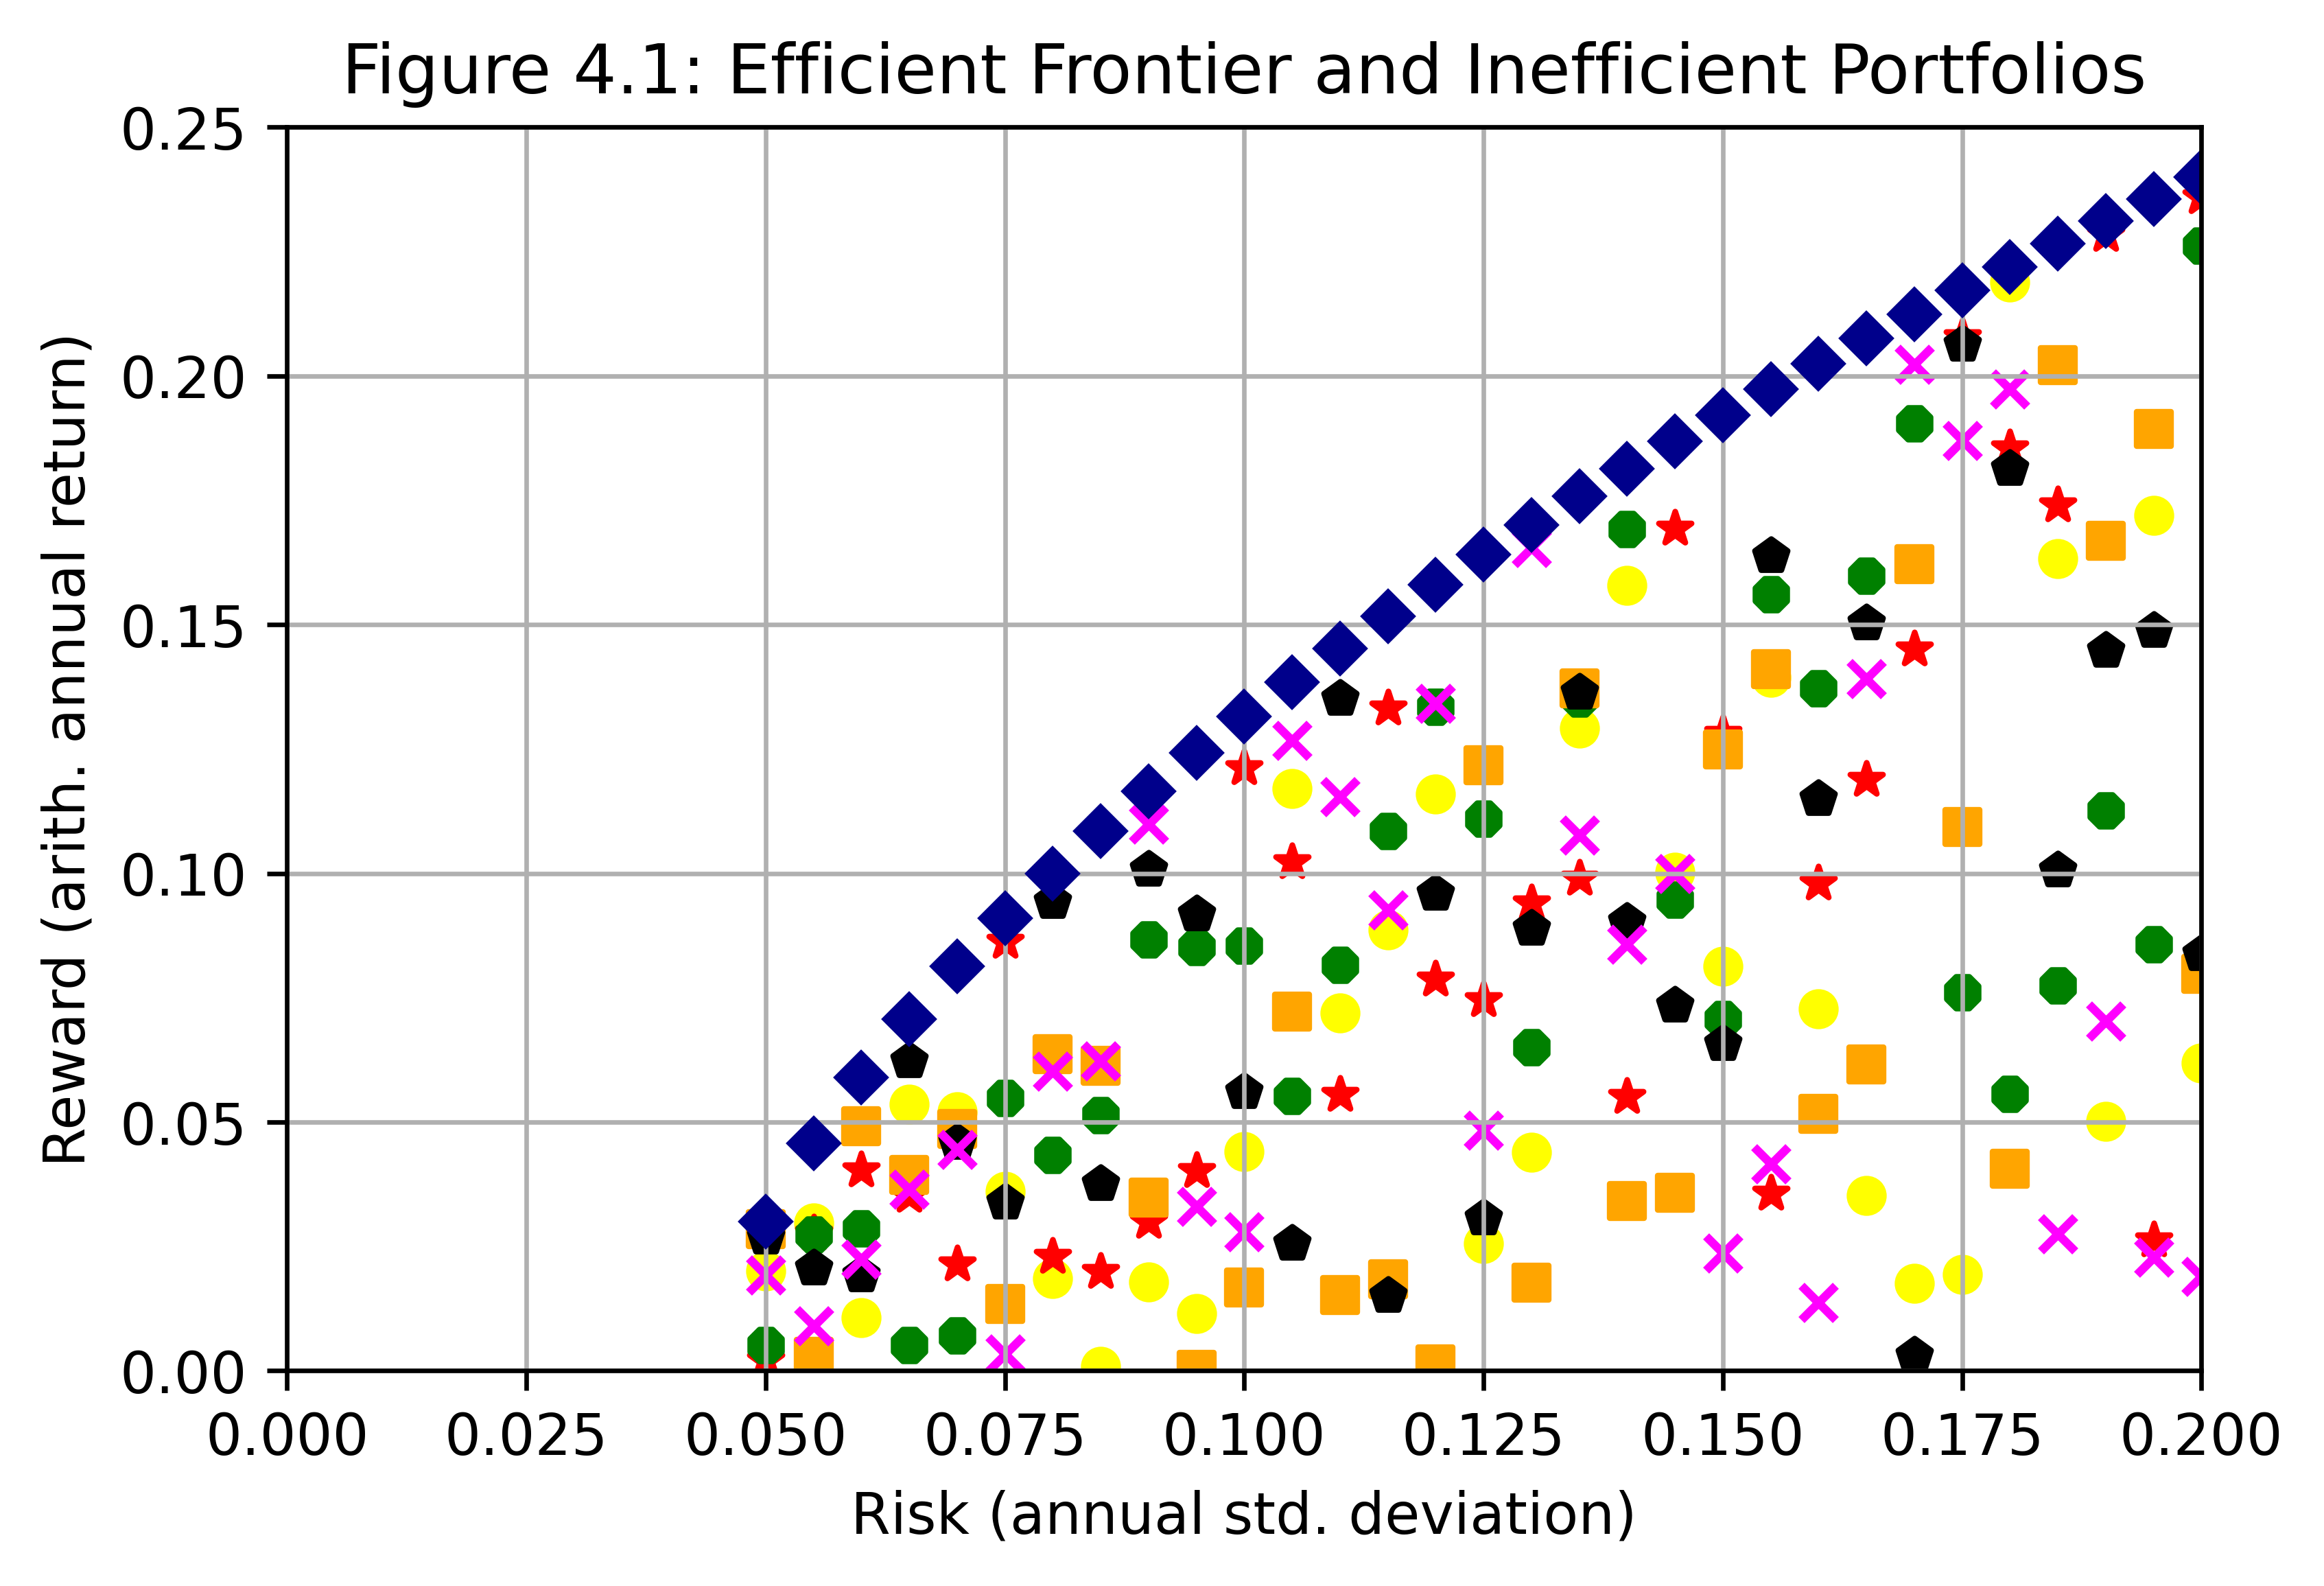

In [7]:
#Code Segment 4.1
#Graph an efficient frontier with inefficient
#points below it
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi']= 300

# evenly sampled standard deviation
t = np.arange(0.05, .2, 0.005)

#Plot the frontier
plt.plot(t, .7*(t-.04)**.5-.04, 'D', color='darkblue')
markers=['o','*','8','s','p','x']
colors=['yellow','red','green','orange','black','magenta']
#Six sets of random inefficient portfolios
np.random.seed(602215)
for i in range(6):
    s=np.random.uniform(0,1,len(t))
    plt.scatter(t, s*(.7*(t-.04)**.5-.04), marker=markers[i], color=colors[i])
plt.axis([0,.2,0,.25])
plt.title('Figure 4.1: Efficient Frontier and Inefficient Portfolios')
plt.xlabel('Risk (annual std. deviation)')
plt.ylabel('Reward (arith. annual return)')
plt.grid(True)
plt.show();

## Code segment 4.2  
Calculation of three-currency example mean vector and covariance matrix in Section 4.1.2

In [8]:
#Code Segment 4.2
import pandas as pd
import qrpm_funcs as qf
#Get 3 currencies until the end of
#previous year. Form sample covariance matrix
#and do simple efficient frontier calculations

lastday=qf.LastYearEnd()
#Swiss franc, pound sterling, Japanese Yen
seriesnames=['DEXSZUS','DEXUSUK','DEXJPUS']
cdates,ratematrix=qf.GetFREDMatrix(seriesnames,enddate=lastday)
multipliers=[-1,1,-1]

lgdates,difflgs=qf.levels_to_log_returns(cdates,ratematrix,multipliers)

#Mean vector and covariance matrix are inputs to efficient frontier calculations
d=np.array(difflgs)
m=np.mean(d,axis=0)
c=np.cov(d.T)

#display the output
#vectors and matrices are in fractional units;
#    fraction*100=percent
#    fraction*10000=basis point
#    (fraction^2)*10000=percent^2
np.set_printoptions(precision=4)
print("From",lgdates[0],"to",lgdates[-1],"(",len(lgdates),"observations):")
print("\nMeans:",m*10000,"bps/day")
print("(CHF, GBP, JPY)\n")
print("  ",c[0]*10000)
print("C=",c[1]*10000,"    (4.20)")
print("  ",c[2]*10000)
print(f'(%/day)\N{SUPERSCRIPT TWO} units')

From 1971-01-05 to 2021-12-30 ( 12784 observations):

Means: [ 1.1994 -0.4635  0.8866] bps/day
(CHF, GBP, JPY)

   [0.4984 0.2403 0.2132]
C= [0.2403 0.3542 0.1132]     (4.20)
   [0.2132 0.1132 0.4009]
(%/day)² units


## Code segment 4.3  
Calculation of $C^{-1}$ in Section 4.1.2

In [9]:
#Code Segment 4.3
#invert the c matrix, which is in (fraction/day)^2 units
#so ci (c-inverse) is in (days/fraction)^2 units
ci=np.linalg.inv(c)
print("          ",ci[0]/10000)
print(f'C-inverse=',ci[1]/10000,"    (4.21)")
print("          ",ci[2]/10000)
print(f'(days/%)\N{SUPERSCRIPT TWO} units')

           [ 3.5165 -1.965  -1.3152]
C-inverse= [-1.965   4.201  -0.1411]     (4.21)
           [-1.3152 -0.1411  3.2336]
(days/%)² units


## Code segment 4.4  
Calculation of $u^{\intercal}C^{-1}u$, $u^{\intercal}C^{-1}m$, and $m^{\intercal}C^{-1}m$ in Section 4.1.2

In [10]:
#Code Segment 4.4
#sum entries in ci
uciu=np.sum(ci)
print(f'u\'(C-inverse)u =',uciu/10000,f'(days/%)\N{SUPERSCRIPT TWO}')
ucim=np.sum(ci @ m)
print(f'u\'(C-inverse)m =',ucim,'days')
mcim = m @ (ci @ m)
print(f'm\'(C-inverse)m =',mcim*10000,'bps')

u'(C-inverse)u = 4.108410547790687 (days/%)²
u'(C-inverse)m = 0.8881677324581265 days
m'(C-inverse)m = 8.006301710547866 bps


## Code segment 4.5  
Solutions for three-currency portfolio example in Section 4.1.2

In [12]:
#Code Segment 4.5
#Vectors for equation 4.6
u=[1]*3
vec2=(ci @ u)/uciu
vec1=np.subtract(ci @ m,vec2*ucim)
print(f"w'=lambda",vec1,"+",vec2,"    (4.6)#")

lambdacoeff=(uciu*mcim-ucim*ucim)/uciu
constmu=ucim/uciu
print(f'mu=(lambda *',lambdacoeff*10000,")+",constmu*10000," bps/day    (4.9)#")

print(f'sigma=sqrt(lambda\N{SUPERSCRIPT TWO} *',lambdacoeff*10000,'+', \
      10000/uciu,') (%/day)   (4.10)#')

w'=lambda [ 3.9114 -4.8819  0.9705] + [0.0575 0.5099 0.4326]     (4.6)#
mu=(lambda * 7.814295115344275 )+ 0.21618280892977995  bps/day    (4.9)#
sigma=sqrt(lambda² * 7.814295115344275 + 0.24340313324766286 ) (%/day)   (4.10)#


## Code segment 4.6  
Figure 4.2 in Section 4.1.2

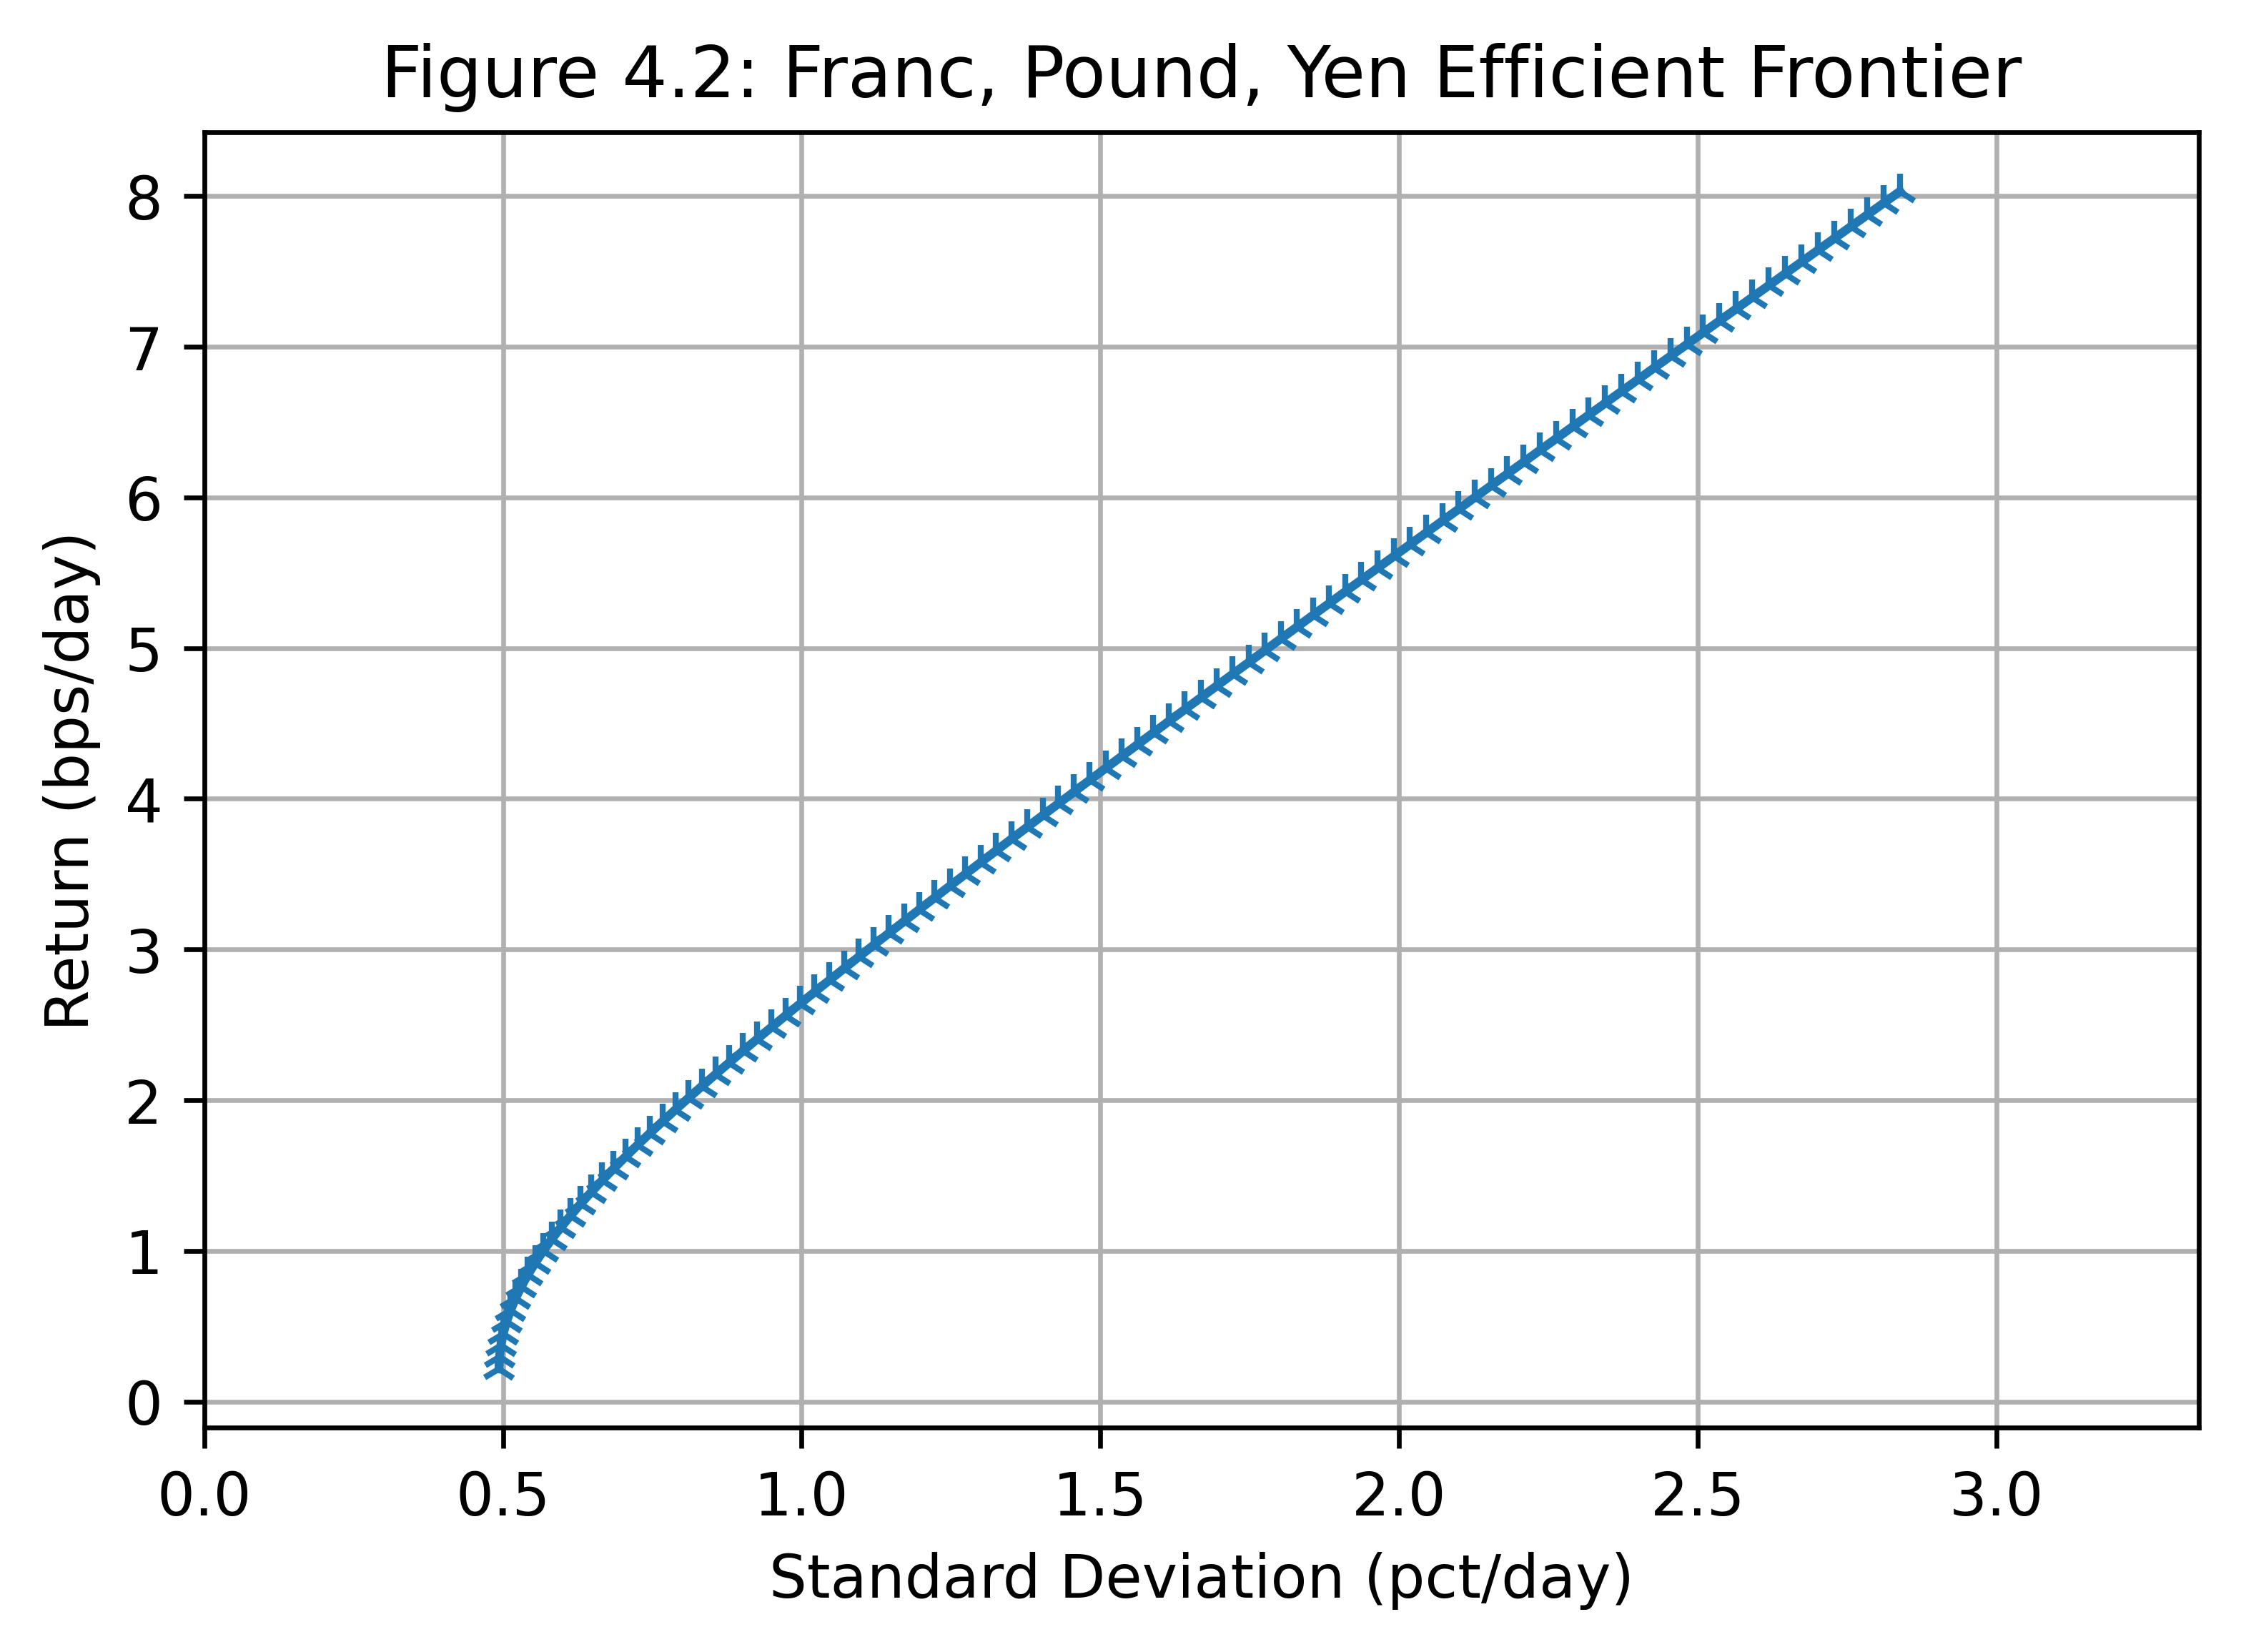

In [13]:
#Code Segment 4.6
#Draw graph of simple efficient frontier
lambda1s=np.arange(0,1.01,.01)
xrisk=100*np.sqrt(lambdacoeff*lambda1s**2+1/uciu)   #Multiply * 100 for percent/day units
yreturn=10000*(lambdacoeff*lambda1s+constmu)        #Multiply * 10000 for bp units

plt.figure(1)
plt.plot(xrisk,yreturn,marker='2')
plt.title("Figure 4.2: Franc, Pound, Yen Efficient Frontier")
plt.xlabel("Standard Deviation (pct/day)")
plt.ylabel("Return (bps/day)")
plt.xlim(0,max(xrisk)+.5)
plt.grid()
plt.show();

## Code segment 4.7  
Calculations in Section 4.1.2

In [14]:
#Code Segment 4.7
print(f'Pound weight goes negative at lambda=',-vec2[1]/vec1[1])
print('At that point mu=',-10000*lambdacoeff*vec2[1]/vec1[1]+10000*constmu,' bps/day')
print('and sigma=',10000*np.sqrt(lambdacoeff*(vec2[1]/vec1[1])**2+1/uciu),' bps/day')

Pound weight goes negative at lambda= 0.10444550265423458
At that point mu= 1.0323507901404427  bps/day
and sigma= 57.32784736020553  bps/day


## Code segment 4.8  
Figure 4.3 in Section 4.1.3

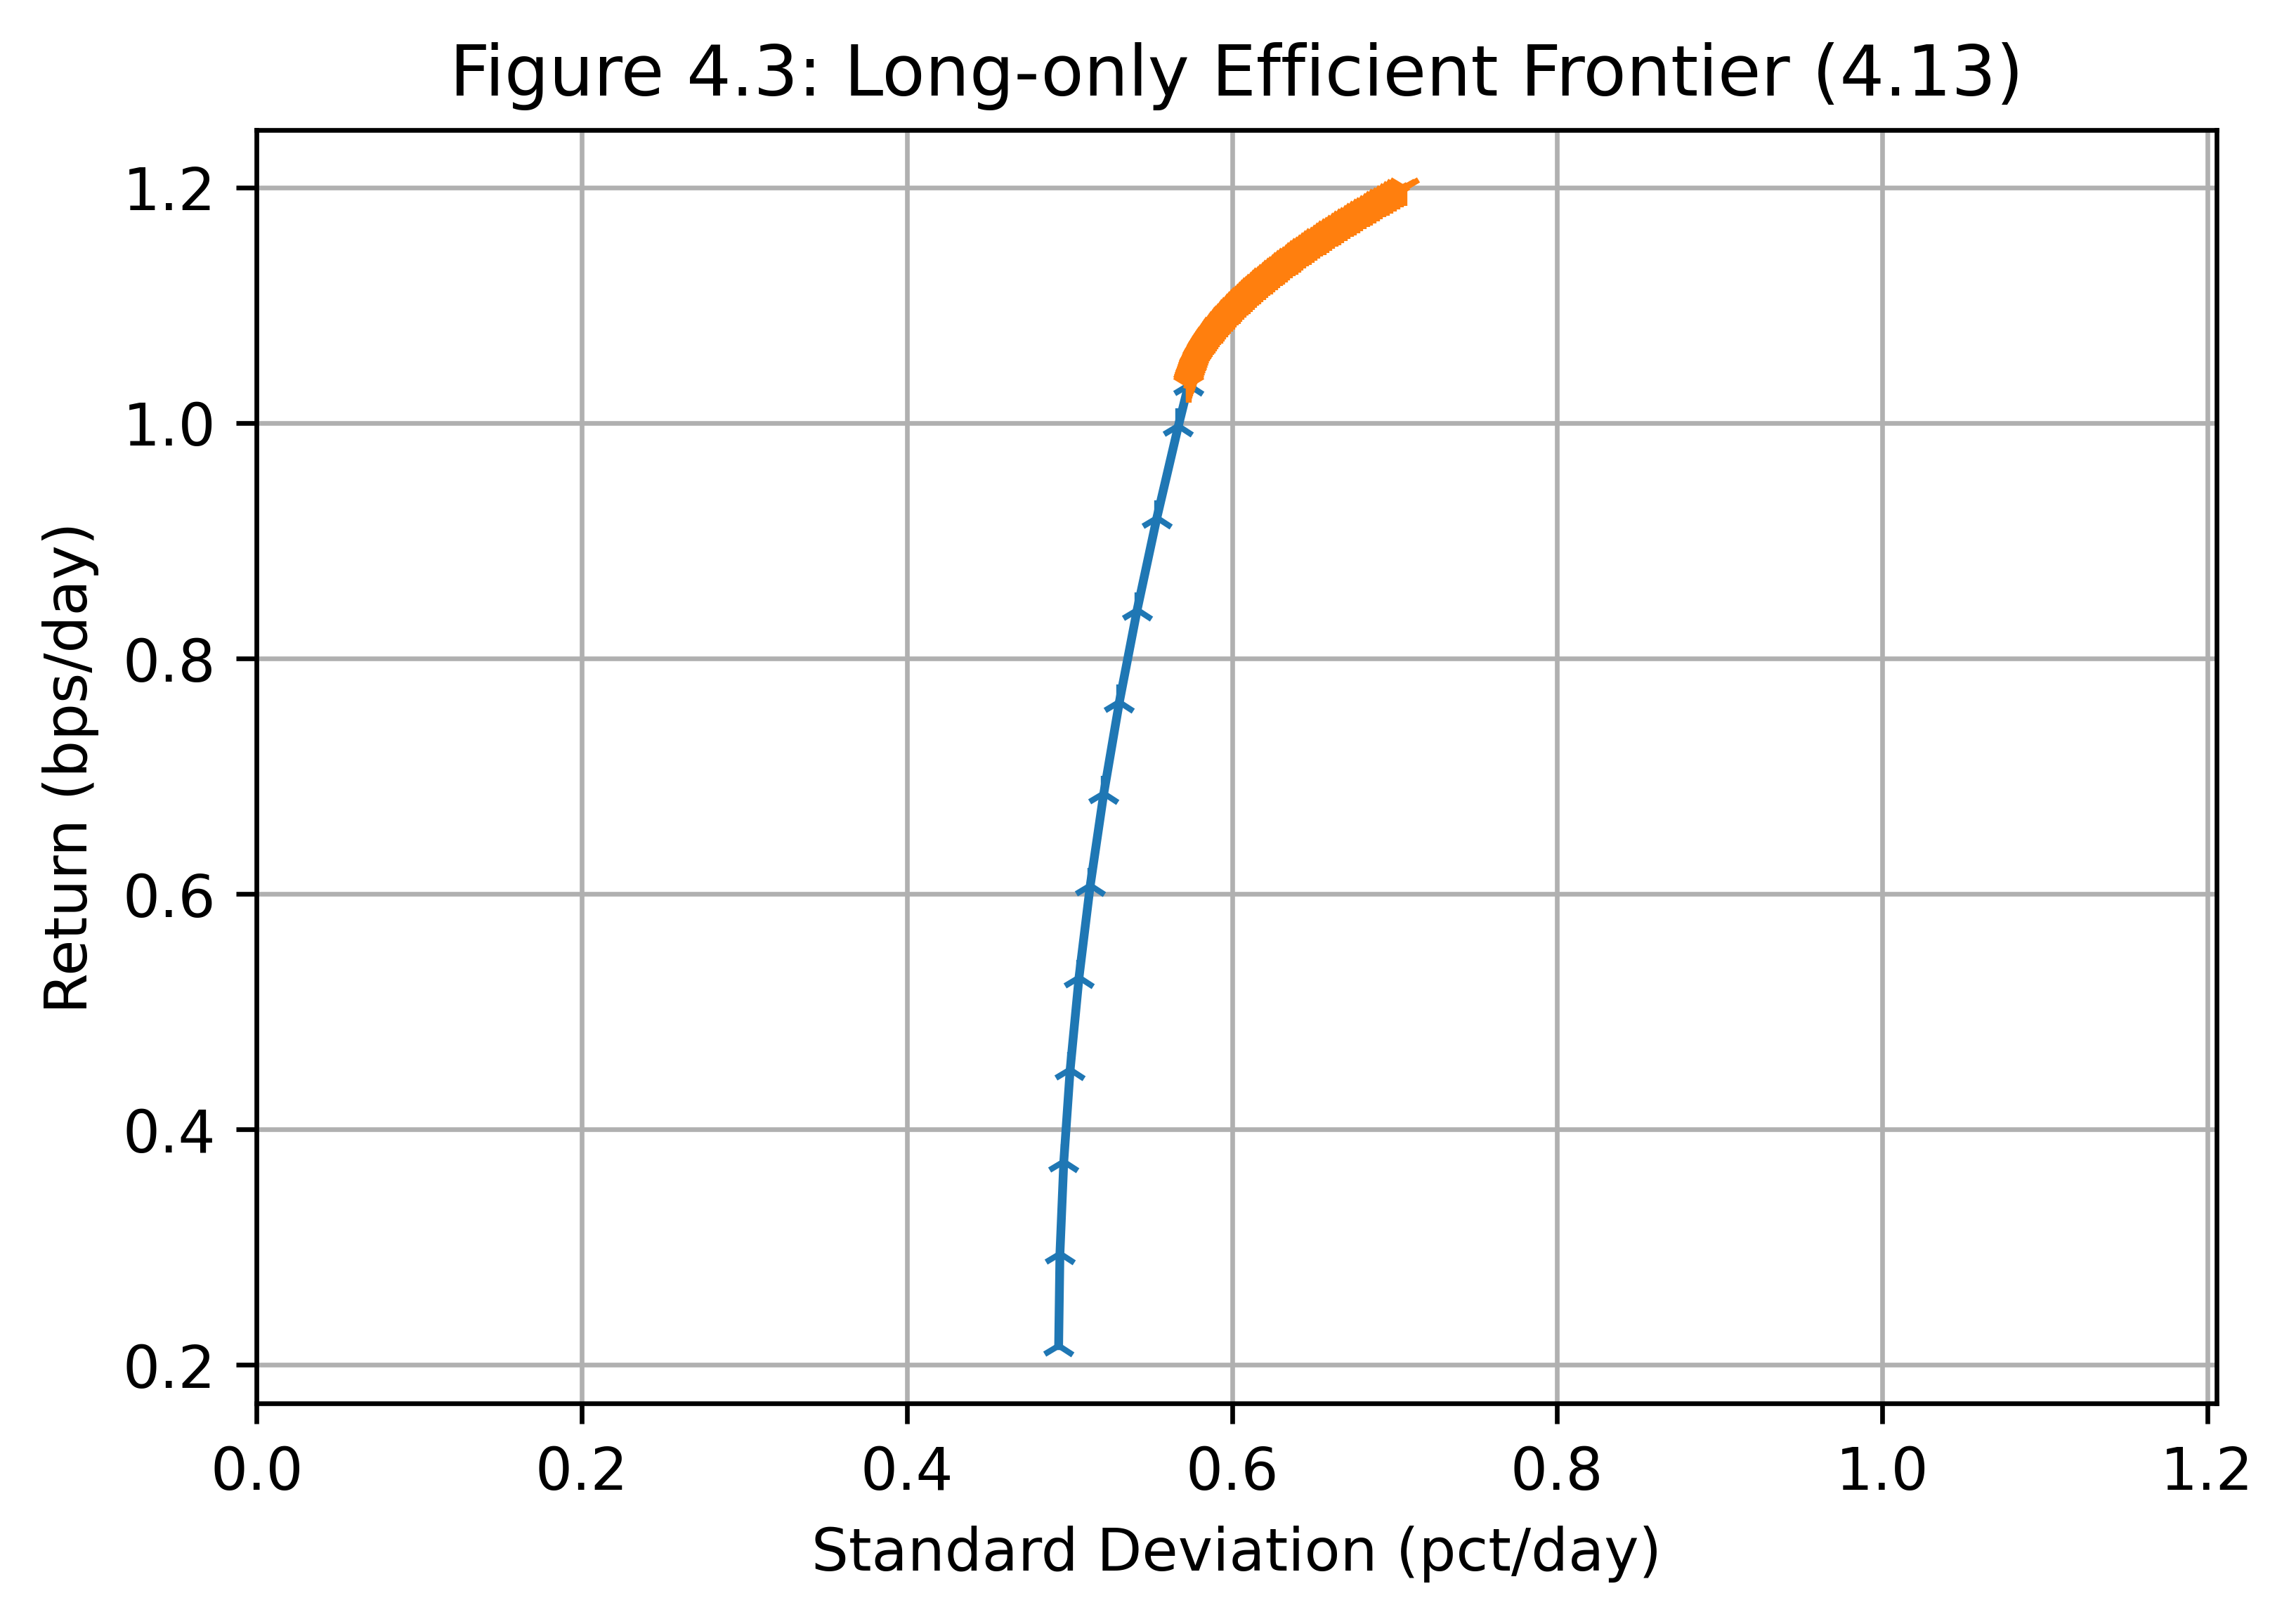

In [16]:
#Code Segment 4.8
#Draw graph of long-only efficient frontier
#Segment with pounds
lambda_nopound=-vec2[1]/vec1[1]
lambda1s=np.arange(0,lambda_nopound,.01)
lambda1s=np.append(lambda1s,lambda_nopound)
x1=100*np.sqrt(lambdacoeff*lambda1s**2+1/uciu)   #Multiply by 100 for percent/day units
y1=10000*(lambdacoeff*lambda1s+constmu)        #Multiply by 10000 for bp units

#Get franc/yen portfolio at the point where pounds disappear
vec3=lambda_nopound*vec1+vec2
#rest of frontier decreases yen and increases francs
deltas=np.arange(0,vec3[2]*1.01,vec3[2]/100.)
x2=[100*np.sqrt(((vec3+[delta,0,-delta]) @ c) @ (vec3+[delta,0,-delta])) \
    for delta in deltas]
y2=[10000*((vec3+[delta,0,-delta]) @ m) for delta in deltas]

plt.figure(1)
plt.plot(x1,y1,marker='2')
plt.plot(x2,y2,marker='1')
plt.title("Figure 4.3: Long-only Efficient Frontier (4.13)")
plt.xlabel("Standard Deviation (pct/day)")
plt.ylabel("Return (bps/day)")
plt.xlim(0,max(x2)+.5)
plt.grid()
plt.show();

## Code segment 4.9  
Figure 4.4 in Section 4.1.5

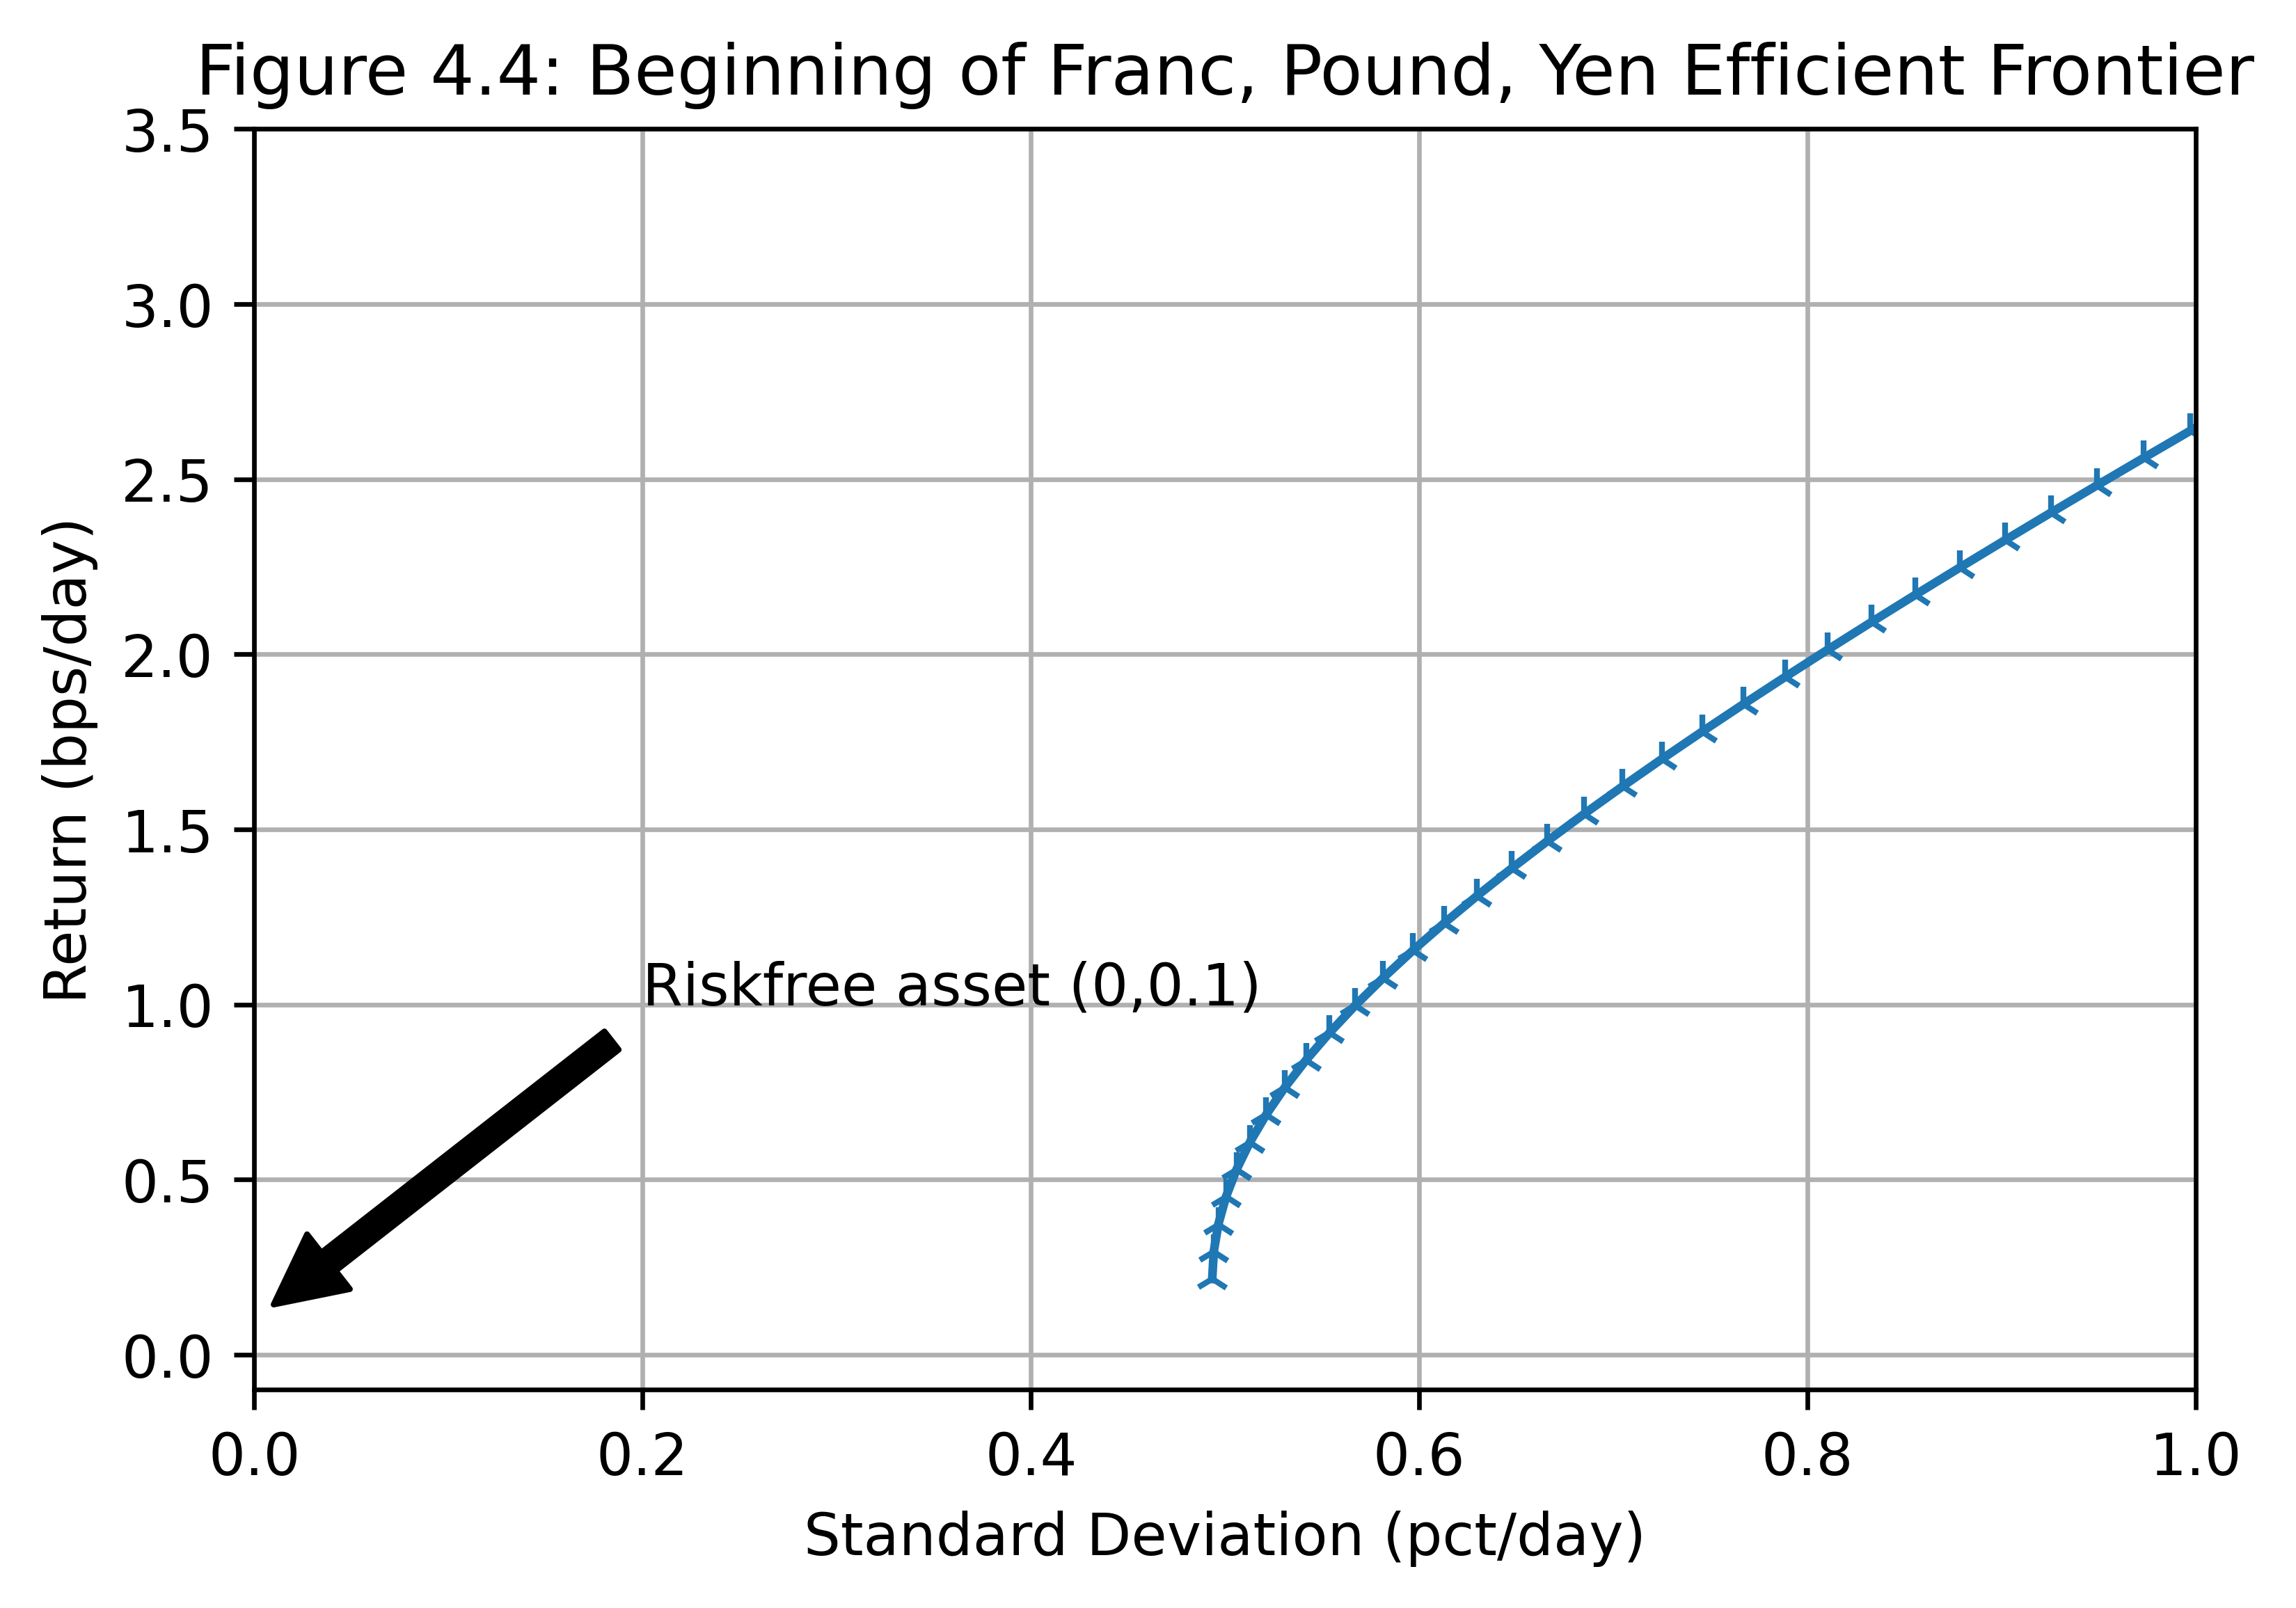

In [17]:
#Code Segment 4.9
#Add a risk-free asset at .1 bps/day
rfrate=10**(-5)
plt.figure(2)
plt.plot(xrisk,yreturn,marker='2')
plt.title("Figure 4.4: Beginning of Franc, Pound, Yen Efficient Frontier")
plt.xlabel("Standard Deviation (pct/day)")
plt.ylabel("Return (bps/day)")
plt.xlim(0,1)
plt.ylim(-.1,3.5)
plt.annotate('Riskfree asset (0,'+str(10000*rfrate)+')', xy=(0, 10000*rfrate),
             xytext=(.2, 1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.grid()
plt.show();

## Code segment 4.10  
Print tangency portfolio in Section 4.1.5

In [18]:
#Code Segment 4.10
#Print the tangency portfolio
rfvec=[rfrate]*3
tangencyport=(ci @ (m-rfvec))/(ucim-rfrate*uciu)
print('Tangency portfolio:',tangencyport)
#Solve for the lambda1 at tangency
mutp=tangencyport @ (m.T)
sigmatp=np.sqrt((tangencyport @ c) @ (tangencyport.T))
tpl1=(mutp-constmu)/lambdacoeff
print('TP mu=',mutp*10000,' bps/day')
print('TP sigma=',sigmatp*100,' pct/day')
print(f"lambda at tangency:",tpl1)

Tangency portfolio: [ 8.2519 -9.7176  2.4658]
TP mu= 16.587141066155883  bps/day
TP sigma= 5.877123583217722  pct/day
lambda at tangency: 2.0950012785004533


## Code segment 4.11  
Figure 4.5 in Section 4.1.5

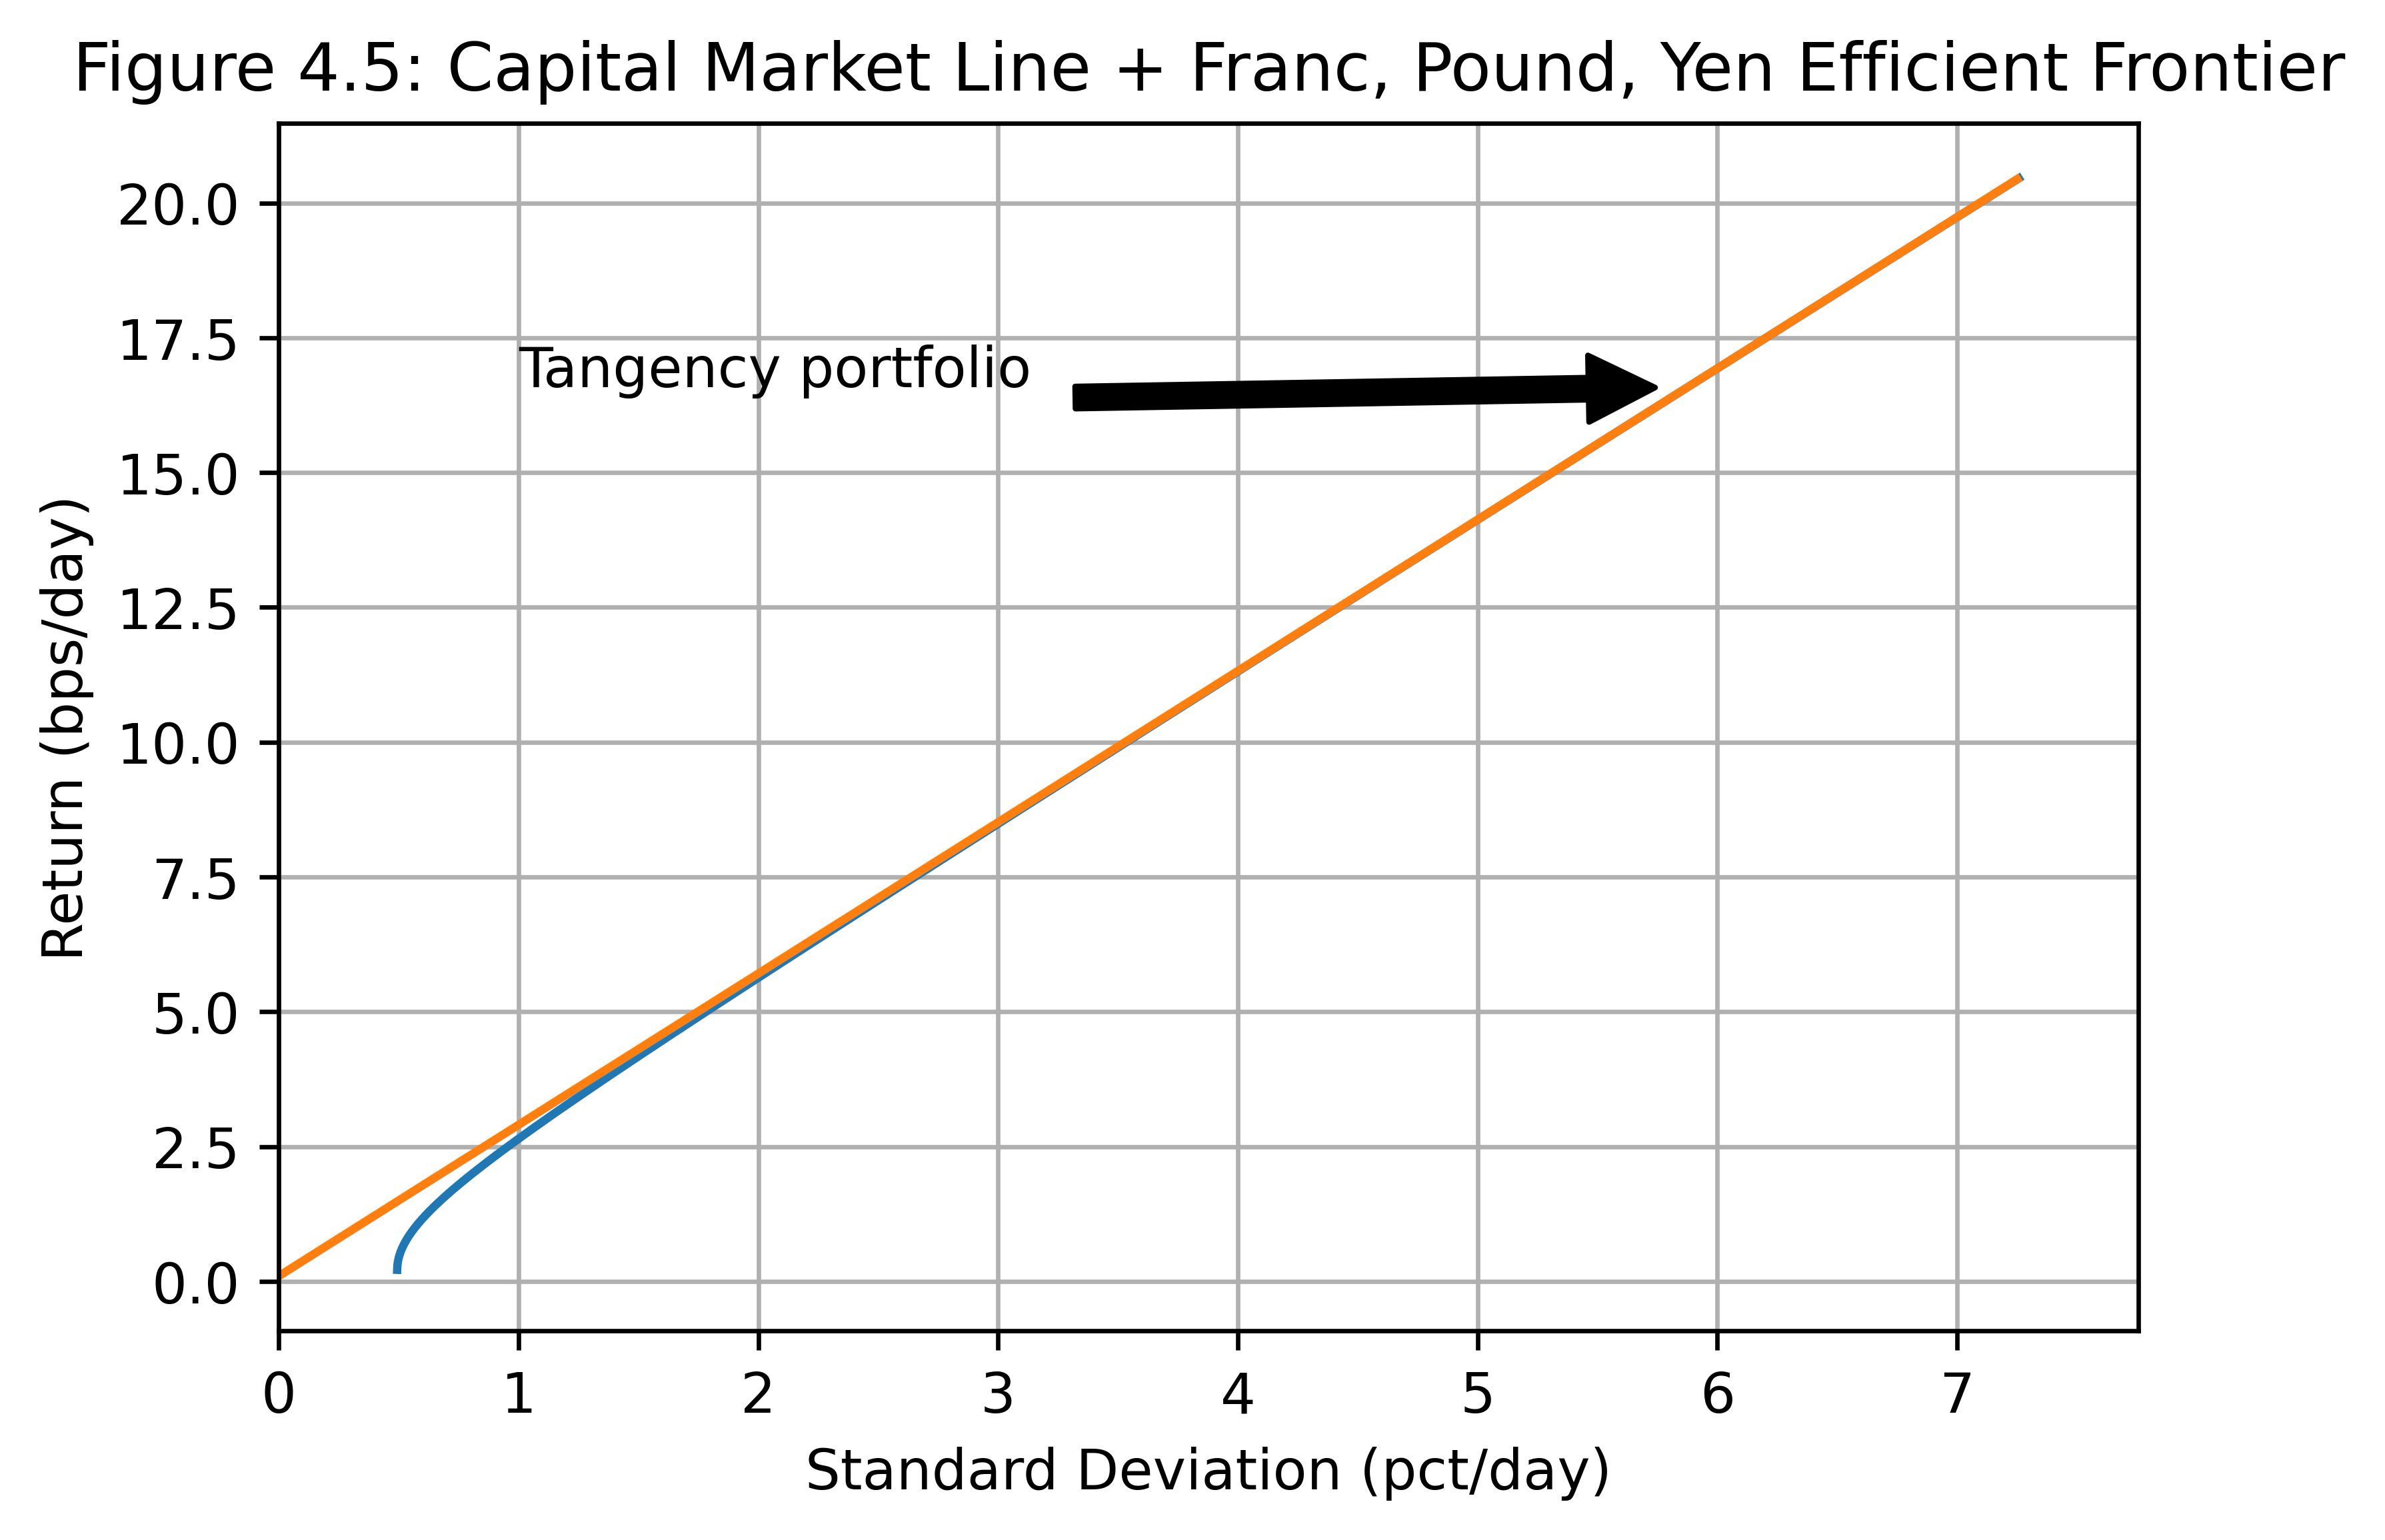

In [19]:
#Code Segment 4.11
#Show capital market line
#Extend frontier
lambda1s=np.arange(0,tpl1+.5,.01)
xrisk=100*np.sqrt(lambdacoeff*lambda1s**2+1/uciu)
yreturn=10000*(lambdacoeff*lambda1s+constmu)

#Compute line
x=np.arange(0,max(xrisk),.01)
y=100*((mutp-rfrate)/sigmatp)*x+10000*rfrate

plt.figure(3)
plt.plot(xrisk,yreturn)
plt.plot(x,y)
plt.annotate('Tangency portfolio', xy=(sigmatp*100, mutp*10000),
             xytext=(1,mutp*10000),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.title("Figure 4.5: Capital Market Line + Franc, Pound, Yen Efficient Frontier")
plt.xlabel("Standard Deviation (pct/day)")
plt.ylabel("Return (bps/day)")
plt.xlim(0,max(xrisk)+.5)
plt.grid()
plt.show;

## Code segment 4.12  
James-Stein and Jorion estimates of the mean vector for three-currency example in Section 4.2.2

In [20]:
#Code Segment 4.12
#Compute James-Stein and Jorion estimates of mean based on previous year
import scipy.spatial as spsp

#Search for end of previous year
for i in range(260,200,-1):
    if lgdates[-i][:4]==lastday[:4]:
        prev_year_n=len(lgdates)-i
        prev_year_date=lgdates[-i-1]
        break

#Form mean vector and covariance matrix up to end of previous year
prev_m=np.average(d[:prev_year_n],axis=0)
prev_c=np.cov(d[:prev_year_n].T)
prev_ci=np.linalg.inv(prev_c)
prev_dim=len(prev_m)
#Set the central prior
central_m=[np.average(prev_m)]*prev_dim

#James-Stein estimate of mean
#Compute scale factor s
s_js=min(1.,(prev_dim-2)/(prev_year_n*spsp.distance.mahalanobis(prev_m,central_m,prev_ci)**2))
james_stein_m=np.multiply(1-s_js,prev_m)+np.multiply(s_js,central_m)
print("James-Stein shrinkage factor:",s_js,"; common mean:",np.average(prev_m))
print("James-Stein estimate of mean as of "+prev_year_date,":",james_stein_m)

#Jorion estimate - get minimum variance portfolio's mean
prev_min_var_mean=(prev_m @ (prev_ci @ ([1]*prev_dim)))/np.sum(prev_ci)
central_m_jorion=[prev_min_var_mean]*prev_dim
s_jorion=spsp.distance.mahalanobis(prev_m,central_m_jorion,prev_ci)**2
s_jorion=min(1.,(prev_dim+2)/(prev_dim+2+prev_year_n*s_jorion))
jorion_m=np.multiply(1-s_jorion,prev_m)+np.multiply(s_jorion,central_m_jorion)
print("\nJorion shrinkage factor:",s_jorion,"; minimum variance mean:",prev_min_var_mean)
print("Jorion estimate of mean as of "+prev_year_date,":",jorion_m)

James-Stein shrinkage factor: 0.09072800398771956 ; common mean: 5.9296734765673194e-05
James-Stein estimate of mean as of 2020-12-31 : [ 1.1906e-04 -3.6734e-05  9.5560e-05]

Jorion shrinkage factor: 0.3232968231767561 ; minimum variance mean: 2.6227489462905185e-05
Jorion estimate of mean as of 2020-12-31 : [ 9.3086e-05 -2.2863e-05  7.5594e-05]


## Code segment 4.13  
Ledoit-Wolf calculations in Section 4.2.2

In [21]:
#Code Segment 4.13
# Ledoit-Wolf heuristic covariance estimator 4.27
# Scikit-Learn Ledoit-Wolf covariance estimator

# Form the three-currency correlation matrix as of previous year
prev_sig=np.sqrt(np.diag(np.diag(prev_c)))
prev_sig_inverse=np.linalg.inv(prev_sig)
prev_r_matrix=(prev_sig_inverse @ prev_c) @ prev_sig_inverse

# Get average correlation (off-diagonal)
prev_avg_corr=(np.sum(prev_r_matrix)-prev_dim)/(prev_dim**2-prev_dim)
# Get average variance
prev_avg_variance=np.matrix.trace(prev_c)/prev_dim
# Centralized prior
prev_prior=prev_avg_variance*(np.ones((prev_dim,prev_dim))*prev_avg_corr+ \
                              np.identity(prev_dim)*(1-prev_avg_corr))

# Compute shrinkage intensity modified from 4.27
shrink_d=np.linalg.norm(prev_c-prev_prior)/np.sqrt(prev_dim)

# b-squared as in 4.26
shrink_b_sq=0
for i in range(prev_year_n):
    mtrx=d[i].reshape(-1,1)
    shrink_b_sq+=np.linalg.norm(mtrx.dot(mtrx.T)-prev_c)**2
shrink_b_sq/=prev_year_n**2
shrink_b_sq/=prev_dim

s_ledoit_wolf_heuristic = min(1,shrink_b_sq/shrink_d**2)

# Ledoit-Wolf estimate
ledoit_wolf_est = np.multiply(1-s_ledoit_wolf_heuristic,prev_c) + \
    np.multiply(s_ledoit_wolf_heuristic,prev_prior)

print("As of",prev_year_date+":")
print("Ledoit-Wolf heuristic shrinkage factor:",s_ledoit_wolf_heuristic)
print("Average correlation:",prev_avg_corr,"; average variance:",prev_avg_variance)
print("Ledoit-Wolf heuristic covariance estimate:\n",ledoit_wolf_est)

# Use Scikit-Learn version
from sklearn.covariance import LedoitWolf
cov = LedoitWolf().fit(d)
print("Scikit-Learn Ledoit-Wolf shrinkage factor:",cov.shrinkage_)
print("Scikit-Learn Ledoit-Wolf covariance estimate:\n",cov.covariance_)

As of 2020-12-31:
Ledoit-Wolf heuristic shrinkage factor: 0.02856113192201865
Average correlation: 0.4498706659045779 ; average variance: 4.231933636558501e-05
Ledoit-Wolf heuristic covariance estimate:
 [[5.0287e-05 2.4193e-05 2.1510e-05]
 [2.4193e-05 3.5972e-05 1.1690e-05]
 [2.1510e-05 1.1690e-05 4.0699e-05]]


Scikit-Learn Ledoit-Wolf shrinkage factor: 0.003352114013335956
Scikit-Learn Ledoit-Wolf covariance estimate:
 [[4.9806e-05 2.3945e-05 2.1246e-05]
 [2.3945e-05 3.5442e-05 1.1280e-05]
 [2.1246e-05 1.1280e-05 4.0093e-05]]


## Code segment 4.14  
Hotelling's Test calculations in Section 4.2.3.1

In [22]:
#Code Segment 4.14
import scipy.stats as spst
#Hotelling's test for james_stein and jorion

def hotelling(T1,T2,p,m1,m2,s1,s2):
    #Compute Hotelling's statistic and p value

    #Combined covariance matrix
    scomb=((T1-1)*s1+(T2-1)*s2)/(T1+T2-2)

    #Multiplier for statistic
    hmult=(T1+T2-p-1)*T1*T2/((T1+T2-2)*p*(T1+T2))

    #Matrix algebra for statistic
    if p==1:
        h12=hmult*(m1-m2)**2/scomb
    else:
        h12=hmult*((m1-m2) @ np.linalg.inv(scomb)) @ (m1-m2)
    
    p_value = 1.0 - spst.f.cdf(h12, p, T1+T2-1-p)
    #Note when the dimension p=1, p_value will equal spst.ttest_ind(x1,x2)

    return(h12,p_value)
    
# Compute mean vector of latest year

latest_m = np.average(d[prev_year_n:],axis=0)

# Compute covariance matrix of latest year
latest_c = np.cov(d[prev_year_n:].T)

# James-Stein
h12_js, p_js = hotelling(prev_year_n,len(d)-prev_year_n,prev_dim, \
                    james_stein_m, latest_m, prev_c, latest_c)

# Jorion
h12_jo, p_jo = hotelling(prev_year_n,len(d)-prev_year_n,prev_dim, \
                    jorion_m, latest_m, prev_c, latest_c)

print("Comparing mean vector estimates as of",prev_year_date)
print("    with mean vector for year ending",lastday+":\n")
print("Hotelling statistics for James-Stein, Jorion:",h12_js,h12_jo)
print("P-values for James-Stein, Jorion:",p_js,p_jo)
if p_js > p_jo:
    print("    James-Stein has higher p-value\n")
else:
    print("    Jorion has higher p- value\n")

def signif_print(thresh,str_name,str_type,p_value):
#Print out text explaining significance
    one_minus_thresh=(1-thresh)*100

    if p_value < thresh:
        str_p=str_name+"Reject null hypothesis of equal "+str_type
        str_p+=" at %2.f" % one_minus_thresh
    else:
        str_p=str_name+"Cannot reject null hypothesis of equal "+str_type
        str_p+=" at %2.f" % one_minus_thresh
    str_p+="% significance"
    print(str_p)
#Done with signif_print
    
thresh=.01
signif_print(thresh,"James-Stein: ","means",p_js)
signif_print(thresh,"Jorion: ","means",p_jo)

Comparing mean vector estimates as of 2020-12-31
    with mean vector for year ending 2021-12-31:

Hotelling statistics for James-Stein, Jorion: 0.6410467792416418 0.5801997842769806
P-values for James-Stein, Jorion: 0.5885261233701673 0.6279567863378335
    Jorion has higher p- value

James-Stein: Cannot reject null hypothesis of equal means at 99% significance
Jorion: Cannot reject null hypothesis of equal means at 99% significance


## Code segment 4.15  
Levene's Test calculations in Section 4.2.3.2

In [23]:
#Code Segment 4.15
# Apply Levene's Test to three-currency example with previous years
# compared to latest year
#Note the results shown are the same as
#scipy.stats.levene(d[:prev_year_n,k],d[prev_year_n:,k],center='mean')

def levene(x1,x2):

    #Numbers of observations
    T1=len(x1)
    T2=len(x2)
    #Could also use median
    m1=np.average(x1)
    m2=np.average(x2)
    #Form absolute difference observations
    z1j=[np.abs(x1[j]-m1) for j in range(T1)]
    z2j=[np.abs(x2[j]-m2) for j in range(T2)]
    #Average absolute difference in each set
    z1=np.average(z1j)
    z2=np.average(z2j)
    #Overall average difference
    z=(T1*z1+T2*z2)/(T1+T2)

    levene_mult=T1+T2-2
    levene_numer=T1*(z1-z)**2+T2*(z2-z)**2
    levene_denom=np.sum((z1j-z1)**2)+np.sum((z2j-z2)**2)

    levene_stat=levene_mult*levene_numer/levene_denom

    p_value = 1 - spst.f.cdf(levene_stat, 1, T1+T2-2)

    return(levene_stat,p_value)
#Done with levene

print("Comparing variances up to",prev_year_date,"with year ending "+lastday+":")
for i in range(prev_dim):

    lstat, p_value = levene(d[:prev_year_n,i],d[prev_year_n:,i])
    print("Levene statistic for "+seriesnames[i]+": ",lstat,", p-value: ",p_value)
    x,y = spst.levene(d[:prev_year_n,i],d[prev_year_n:,i],center='mean')
    print("Cross-check: results of scipy.stats.levene:",x,y)
    signif_print(thresh,seriesnames[i]+": ","variances",p_value)


Comparing variances up to 2020-12-31 with year ending 2021-12-31:
Levene statistic for DEXSZUS:  40.01670112746961 , p-value:  2.601971971216699e-10
Cross-check: results of scipy.stats.levene: 40.01670112746961 2.6019715443618535e-10
DEXSZUS: Reject null hypothesis of equal variances at 99% significance
Levene statistic for DEXUSUK:  13.535888739663358 , p-value:  0.0002350056470314943
Cross-check: results of scipy.stats.levene: 13.535888739663358 0.00023500564703147385
DEXUSUK: Reject null hypothesis of equal variances at 99% significance
Levene statistic for DEXJPUS:  34.26963095558968 , p-value:  4.915895357449074e-09
Cross-check: results of scipy.stats.levene: 34.26963095558968 4.9158953785410015e-09
DEXJPUS: Reject null hypothesis of equal variances at 99% significance


## Code segment 4.16  
Box's M Test calculations in Section 4.2.3.3

In [24]:
#Code Segment 4.15
# Box M Test for covariance matrices
# From G.E.P. Box, "A General Distribution Theory for a Class of Likelihood Criteria",
# Biometrika 36, December 1949, pp. 317-346.

def BoxM(T1,T2,s1,s2):
    #Tests for equality of two covariance matrices, s1 and s2
    #T1 and T2 are numbers of observations for s1 and s2
    #Returns M statistic and p-value

    #Make sure dimension is common
    if len(s1)!=len(s2):
        print("Error: different dimensions in Box M Test:",len(s1),len(s2))
        return(0,0)
    
    #Matrices are pxp
    p=len(s1)

    #Form the combined matrix
    scomb=(T1*s1+T2*s2)/(T1+T2)

    #Box M statistic
    Mstat=(T1+T2-2)*np.log(np.linalg.det(scomb))-(T1-1)* \
        np.log(np.linalg.det(s1))-(T2-1)*np.log(np.linalg.det(s2))

    #Multipliers from equation (49) in Box 1949.
    A1=(2*p**2+3*p-1)/(6*(p+1))
    A1*=(1/(T1-1)+1/(T2-1)-1/(T1+T2-2))

    A2=(p-1)*(p+2)/6
    A2*=(1/(T1-1)**2+1/(T2-1)**2-1/(T1+T2-2)**2)

    discrim=A2-A1**2

    #Degrees of freedom
    df1=p*(p+1)/2

    if discrim <= 0:
        #Use chi-square (Box 1949 top p. 329)
        test_value=Mstat*(1-A1)
        p_value=1-spst.chi2.cdf(test_value,df1)
    else:
        #Use F Test (Box 1949 equation (68))
        df2=(df1+2)/discrim
        b=df1/(1-A1-(df1/df2))
        test_value=Mstat/b
        p_value=1-spst.f.cdf(test_value,df1,df2)
    
    return(test_value,p_value)
#Done with BoxM

print("Comparing variances up to",prev_year_date,"with year ending "+lastday+":")

#Apply to sample variances
stat, p_value = BoxM(prev_year_n,len(d)-prev_year_n,np.diag(np.diag(prev_c)), \
                     np.diag(np.diag(latest_c)))
print("Box M-stat and p-value for sample variances only:",stat,p_value)
signif_print(thresh,"","sample variances only",p_value)

#Compute latest correlation matrix
latest_sig=np.sqrt(np.diag(np.diag(latest_c)))
latest_sig_inverse=np.linalg.inv(latest_sig)
latest_r_matrix=(latest_sig_inverse @ latest_c) @ latest_sig_inverse

#Apply to sample correlations
stat, p_value = BoxM(prev_year_n,len(d)-prev_year_n,prev_r_matrix,latest_r_matrix)
print("\nBox M-stat and p-value for sample correlation matrices:",stat,p_value)
signif_print(thresh,"","sample correlation matrices",p_value)

#Apply to Ledoit-Wolf heuristic correlations
lwh_sig=np.sqrt(np.diag(np.diag(ledoit_wolf_est)))
lwh_sig_inverse=np.linalg.inv(lwh_sig)
lwh_r_matrix=(lwh_sig_inverse @ ledoit_wolf_est) @ lwh_sig_inverse
stat, p_value = BoxM(prev_year_n,len(d)-prev_year_n,lwh_r_matrix,latest_r_matrix)
print("\nBox M-stat and p-value for Ledoit-Wolf heuristic vs. "+ \
      "latest sample correlations:",stat,p_value)
signif_print(thresh,"","correlation matrices",p_value)


Comparing variances up to 2020-12-31 with year ending 2021-12-31:
Box M-stat and p-value for sample variances only: 50.32418275579166 1.1102230246251565e-16
Reject null hypothesis of equal sample variances only at 99% significance

Box M-stat and p-value for sample correlation matrices: 2.4087684034417576 0.024969986917721343
Cannot reject null hypothesis of equal sample correlation matrices at 99% significance

Box M-stat and p-value for Ledoit-Wolf heuristic vs. latest sample correlations: 2.4470218937300436 0.02287913453214485
Cannot reject null hypothesis of equal correlation matrices at 99% significance


## Code segment 4.17  
Figure 4.6 in Section 4.2.4

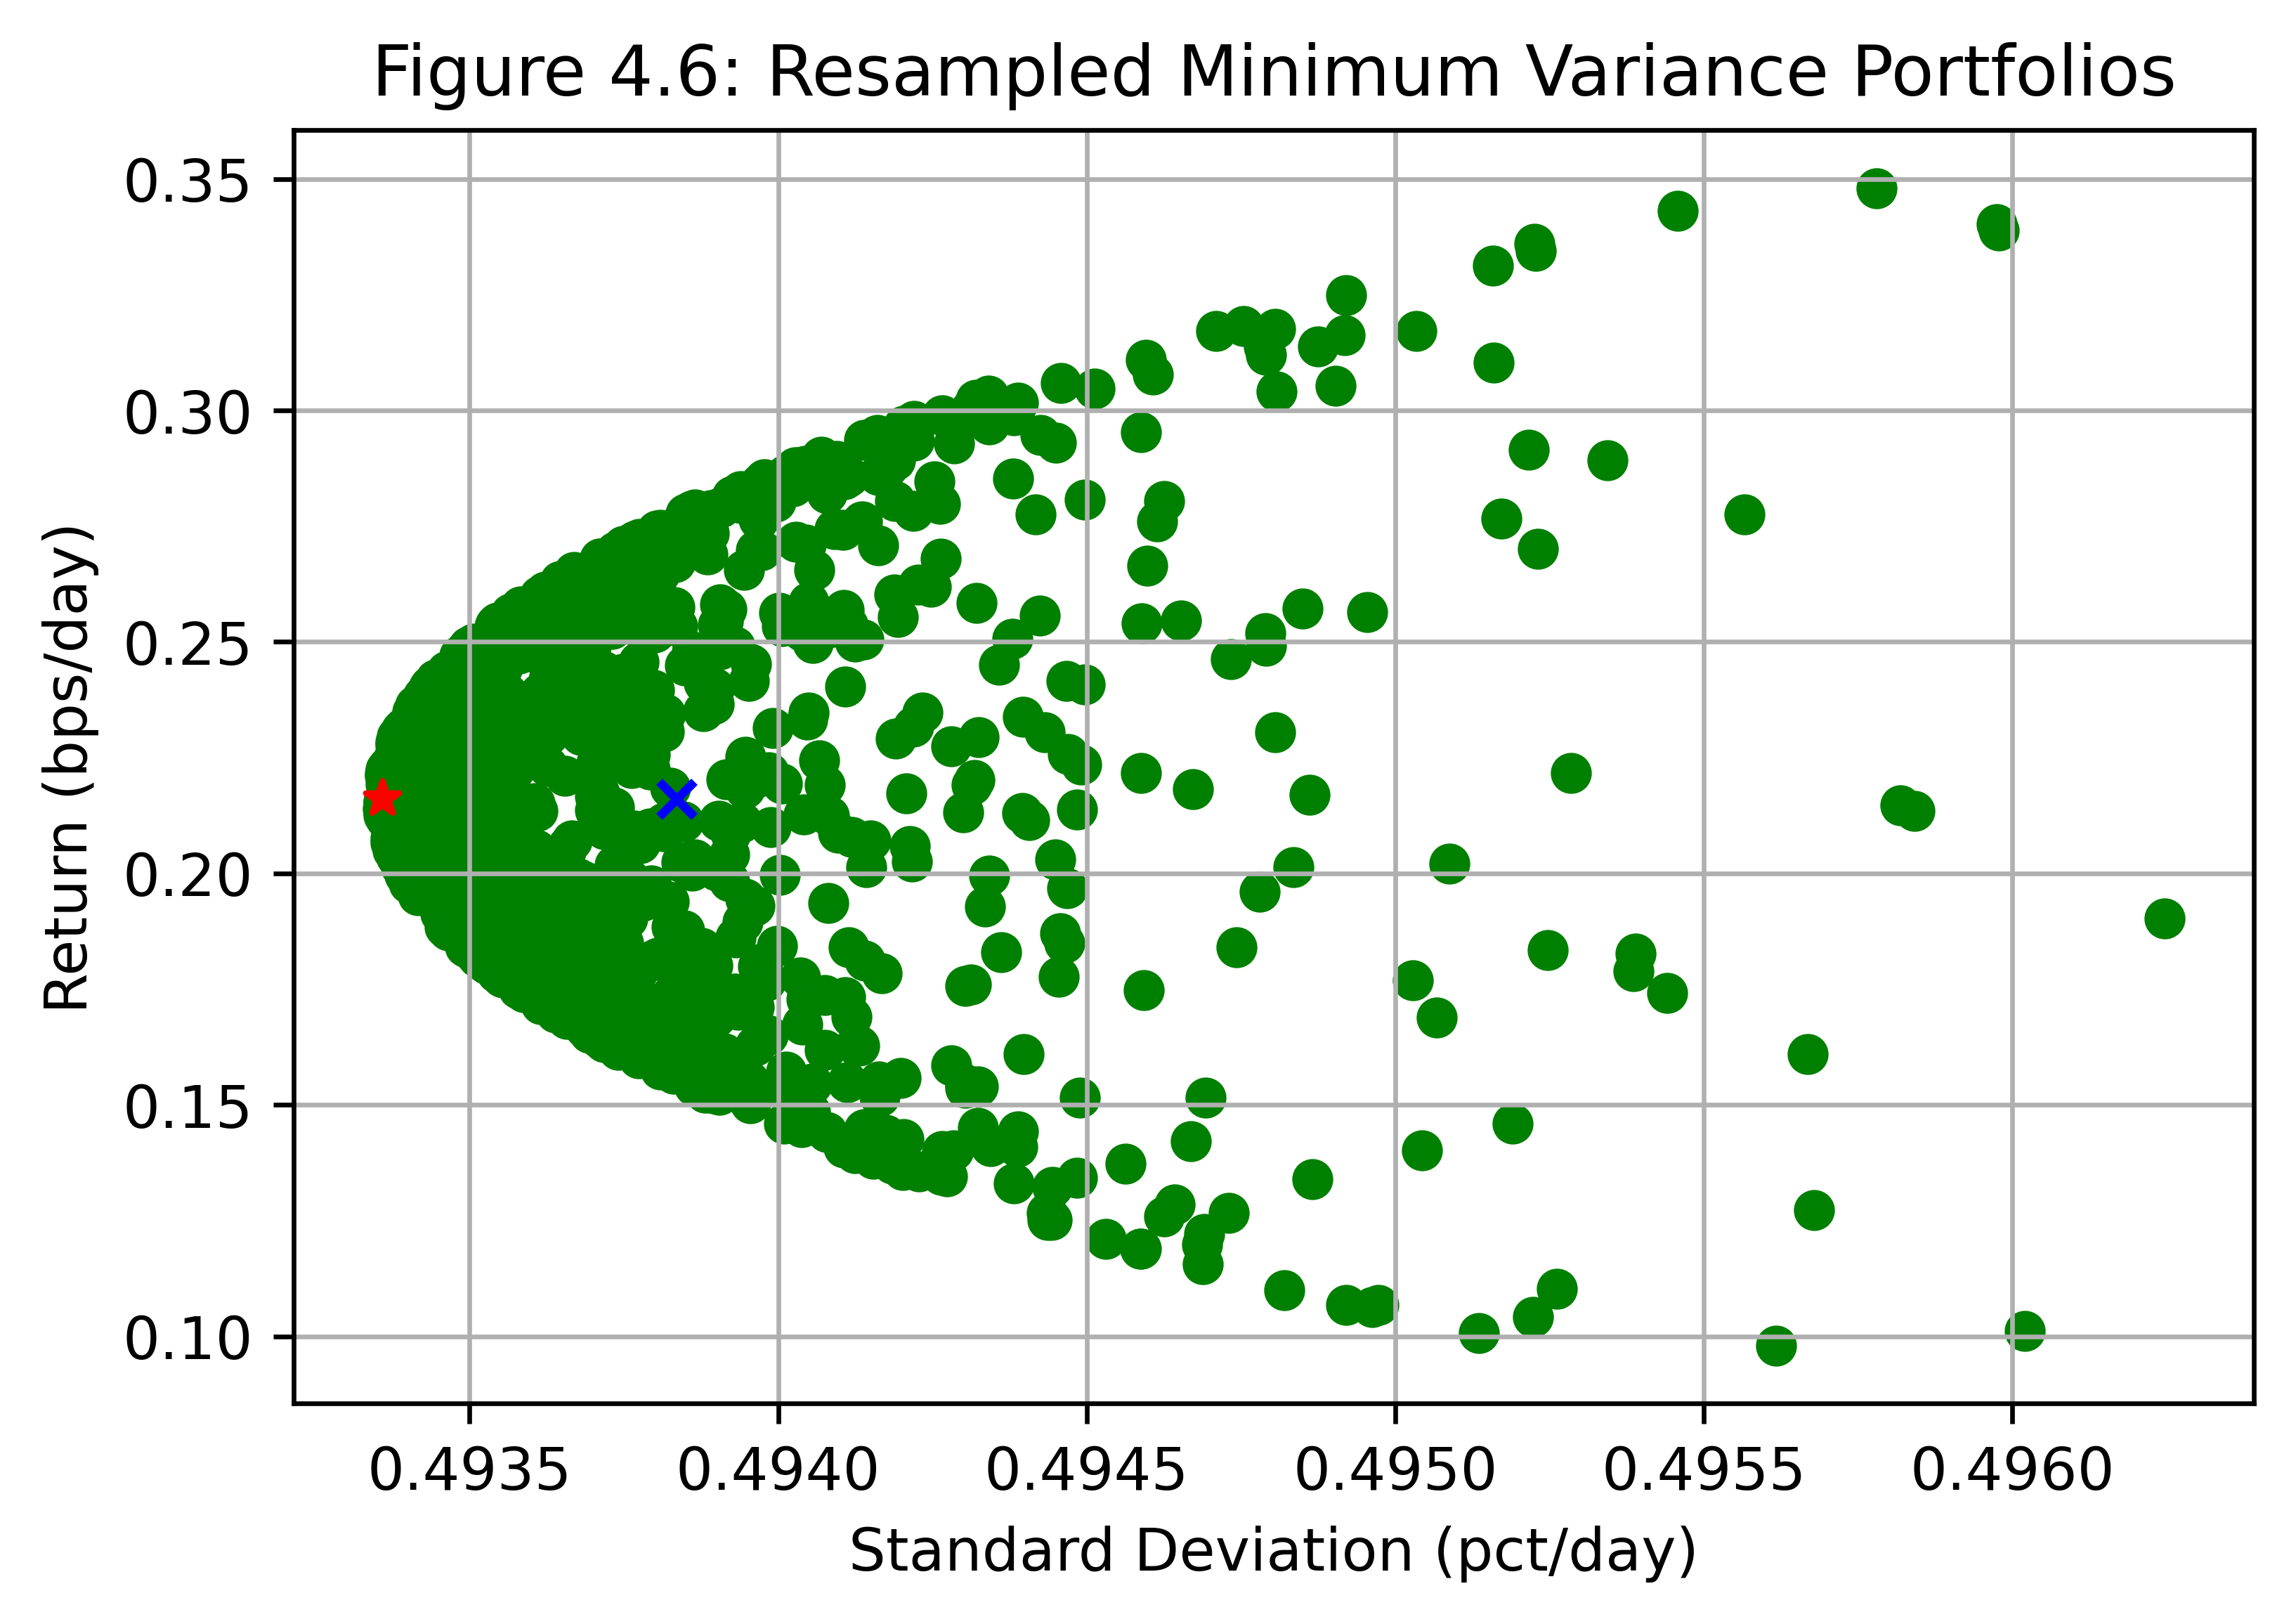

In [25]:
#Code Segment 4.17
#Resample the minimum variance portfolio from 3-currency example
np.random.seed(662607)

samp_size=1000
samp_time_periods=1000
samp_stds=[]
samp_means=[]
samp_portfolios=[]
for trial in range(samp_size):
    #Generate a virtual history of returns in x
    x=np.random.multivariate_normal(m,c,samp_time_periods)
    #Compute the virtual history's mean, covariance, and inverse covariance
    samp_m=np.mean(x,axis=0)
    samp_c=np.cov(x.T)
    samp_ci=np.linalg.inv(samp_c)
    #Compute minimum variance portfolio s_vec2 according to new parameters
    s_uciu=np.sum(samp_ci)
    s_vec2=(samp_ci @ u)/s_uciu
    #Find the mean and standard deviation of
    #this portfolio according to the old parameters
    samp_means.append(10000*(s_vec2 @ m))
    samp_stds.append(100*np.sqrt((s_vec2 @ c) @ s_vec2))
    samp_portfolios.append(s_vec2)

#Plot the minimum variance portfolios 
plt.scatter(samp_stds,samp_means,marker='o',color='green')
#Plot the original MV portfolio
plt.scatter(np.sqrt(10000./uciu),10000.*ucim/uciu,marker='*',color='red')
#Plot the average of the resampled MV portfolios
plt.scatter(np.mean(samp_stds),np.mean(samp_means),marker='x',color='blue')
#Zoom in on the x-range
xdiff=np.max(samp_stds)-np.min(samp_stds)
plt.xlim(np.min(samp_stds)-.05*xdiff,np.max(samp_stds)+.05*xdiff)
plt.title('Figure 4.6: Resampled Minimum Variance Portfolios')
plt.xlabel('Standard Deviation (pct/day)')
plt.ylabel('Return (bps/day)')
plt.grid(True)
plt.show();

## Code segment 4.18  
Confidence interval in Section 4.2.4

In [26]:
#Code Segment 4.18
#Show the 95% confidence intervals for the MV portfolio    
bottom=np.percentile(samp_portfolios,5,axis=0)
middle=np.percentile(samp_portfolios,50,axis=0)
top=np.percentile(samp_portfolios,95,axis=0)
print("95% confidence for MV portfolio:")
print("                     (CHF      GBP     JPY)")
print("Bottom of interval: ",bottom)
print("Middle of interval: ",middle)
print("Original MV port:   ",vec2)
print("Top of interval:    ",top)

95% confidence for MV portfolio:
                     (CHF      GBP     JPY)
Bottom of interval:  [0.0113 0.4631 0.3938]
Middle of interval:  [0.0574 0.5105 0.4325]
Original MV port:    [0.0575 0.5099 0.4326]
Top of interval:     [0.106  0.5535 0.4715]


## Code segment 4.19  
Black-Litterman "market" calculation in Section 4.3.1

In [27]:
#Code Segment 4.19
#Fake "market" for the three currencies
wmkt=np.array([.05,.15,.8])
mumkt=wmkt @ (m.T)
varmkt=(wmkt @ c) @ (wmkt.T)
print('Mkt mu=',mumkt*10000,' bps/day')
print(f'Mkt sigma\N{SUPERSCRIPT TWO}=',varmkt*10000,f'(%/day)\N{SUPERSCRIPT TWO}')

Mkt mu= 0.6996911437388623  bps/day
Mkt sigma²= 0.313619284791315 (%/day)²


## Code segment 4.20  
Black-Litterman CAPM calculations in Section 4.3.1

In [28]:
#Code Segment 4.20
betavec=(c @ wmkt)/varmkt
print('beta =',betavec)

mucapm=np.multiply(10000,rfvec+(mumkt-rfrate)*betavec)
print('mu-CAPM=',mucapm,' bps/day')

beta = [0.7382 0.4965 1.1108]
mu-CAPM= [0.5427 0.3977 0.7661]  bps/day


## Code segment 4.21  
Black-Litterman views calculation in Section 4.3.1

In [29]:
#Code Segment 4.21
#View that pounds will outperform yen
view=np.array([0,1,-1])
pview=.00002

gamma=np.matrix([.0001])
sweight=1

#First Black-Litterman matrix calculation
print('C-inverse/s=',ci/sweight)
#Second matrix
v1=(np.matrix(view).T) @ np.linalg.inv(gamma)
vgvmtrx=v1 @ np.matrix(view)
print('V\'(Gamma-inverse)V=',vgvmtrx)
#Sum of the two
print('Sum=',ci/sweight+vgvmtrx)

m1inv=np.linalg.inv(ci/sweight+vgvmtrx)
print('Sum inverse (pct/day)**2=',m1inv*10000)

C-inverse/s= [[ 35165.3773 -19650.3851 -13151.8981]
 [-19650.3851  42009.9265  -1411.1725]
 [-13151.8981  -1411.1725  32335.7129]]
V'(Gamma-inverse)V= [[     0.      0.      0.]
 [     0.  10000. -10000.]
 [     0. -10000.  10000.]]
Sum= [[ 35165.3773 -19650.3851 -13151.8981]
 [-19650.3851  52009.9265 -11411.1725]
 [-13151.8981 -11411.1725  42335.7129]]
Sum inverse (pct/day)**2= [[0.4979 0.236  0.2183]
 [0.236  0.3162 0.1586]
 [0.2183 0.1586 0.3468]]


## Code segment 4.22  
Further Black-Litterman calculations in Section 4.3.1

In [30]:
#Code Segment 4.22
cimcs=(ci @ (mucapm/sweight))*10**(-4)
print('C-inverse*muCAPM/s=',cimcs)

print('V\'(Gamma-Inverse)p=',v1*pview)
m2=cimcs+v1.T*pview
print('Sum=',m2)
print("(All in units of days)")

C-inverse*muCAPM/s= [0.1192 0.4963 1.7075]
V'(Gamma-Inverse)p= [[ 0. ]
 [ 0.2]
 [-0.2]]
Sum= [[0.1192 0.6963 1.5075]]
(All in units of days)


## Code segment 4.23  
Black-Litterman final estimate in Section 4.3.1

In [31]:
#Code Segment 4.23
mufinal=(m1inv @ (m2.T))*10000
print('Black-Litterman mu (bps/day):',mufinal)

Black-Litterman mu (bps/day): [[0.5528]
 [0.4873]
 [0.6591]]
